In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [6]:
#データ準備
N = 300
x,t = datasets.make_moons(N,noise=.3)
t = t.reshape(N,1)
x_train, x_test, t_train, t_test = train_test_split(x,t,test_size = .2)

In [4]:
x.shape

(300, 2)

In [5]:
t.shape

(300, 1)

In [8]:
#モデル構築
model = Sequential()
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
#入力次元の正楽

In [9]:
#モデル学習
optimizer = optimizers.SGD(learning_rate=.1)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(x_train, t_train, epochs = 100,  batch_size = 10, verbose = 1)

Train on 240 samples
Epoch 1/100
240/240 [==============================] - 1s 3ms/sample - loss: 0.6949 - accuracy: 0.5375
Epoch 2/100
240/240 [==============================] - 0s 165us/sample - loss: 0.6690 - accuracy: 0.6125
Epoch 3/100
240/240 [==============================] - 0s 178us/sample - loss: 0.6459 - accuracy: 0.7500
Epoch 4/100
240/240 [==============================] - 0s 171us/sample - loss: 0.6235 - accuracy: 0.7833
Epoch 5/100
240/240 [==============================] - 0s 170us/sample - loss: 0.5995 - accuracy: 0.7875
Epoch 6/100
240/240 [==============================] - 0s 164us/sample - loss: 0.5766 - accuracy: 0.7875
Epoch 7/100
240/240 [==============================] - 0s 167us/sample - loss: 0.5547 - accuracy: 0.7667
Epoch 8/100
240/240 [==============================] - 0s 163us/sample - loss: 0.5340 - accuracy: 0.7750
Epoch 9/100
240/240 [==============================] - 0s 172us/sample - loss: 0.5150 - accuracy: 0.7750
Epoch 10/100
240/240 [==============

In [10]:
#モデル評価
loss, acc =model.evaluate(x_test, t_test, verbose = 0)

In [11]:
loss

0.2960385819276174

In [12]:
acc

0.8833333

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [30]:
class MLP(Model):
    def __init__(self, hidden_dim, output_dim):
        super().__init__()
        self.l1 = Dense(hidden_dim, activation='sigmoid')
        self.l2 = Dense(output_dim, activation='sigmoid')
        
    def call(self, x):
        h = self.l1(x)
        y = self.lw(h)
        return y

In [31]:
#データ準備

In [32]:
#モデル構築
model = MLP(3,1)

In [33]:
#モデル学習
    criterion = losses.BinaryCrossentropy()
    optimizer = optimizers.SGD(learning_rate=0.1)

    def compute_loss(t, y):
        return criterion(t, y)

    def train_step(x, t):
        with tf.GradientTape() as tape:
            preds = model(x)
            loss = compute_loss(t, preds)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        return loss

    epochs = 100
    batch_size = 10
    n_batches = x_train.shape[0] // batch_size

    for epoch in range(epochs):
        train_loss = 0.
        x_, t_ = shuffle(x_train, t_train)

        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size
            loss = train_step(x_[start:end], t_[start:end])
            train_loss += loss.numpy()

        print('epoch: {}, loss: {:.3}'.format(
            epoch+1,
            train_loss
        ))
        

TypeError: __init__() got an unexpected keyword argument 'learning_rate'

In [34]:
#モデル評価
test_loss = metrics.Mean()
test_acc = metrics.BinaryAccuracy()

def test_step(x,t):
    preds = model(x)
    loss = compute_loss(t,predsds)
    test_loss(loss)
    test_acc(t, preds)
    return preds

test_step(x_test, t_test)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



AttributeError: 'MLP' object has no attribute 'lw'

In [7]:
import torch
import torch.nn as nn
import torch.optim as optimizers
from sklearn.metrics import accuracy_score

In [61]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.l1 =nn.Linear(input_dim, hidden_dim)
        self.a1 = nn.Sigmoid()
        self.l2 = nn.Linear(hidden_dim, output_dim)
        self.a2 = nn.Sigmoid()
        
        self.layers = [self.l1, self.a1, self.l2, self.a2]
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
            
        return x

In [62]:
#データ準備

In [63]:
#モデル構築
model = MLP(2,3,1)

In [64]:
#モデル学習
criterion = nn.BCELoss()
optimizer = optimizers.SGD(model.parameters(),lr = .1)

In [65]:
def compute_loss(t, y):
    return criterion(y,t)

def train_step(x,t):
    model.train()
    preds = model(x)
    loss = compute_loss(t,preds)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss

In [66]:
epochs = 100
batch_size = 10
n_batches = x_train.shape[0]//batch_size
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for epoch in range(epochs):
    train_loss = 0
    x_,t_ = shuffle(x_train, t_train)
    x_ = torch.Tensor(x_).to(device)
    t_ = torch.Tensor(t_).to(device)
    
    for n_batch in range(n_batches):
        start = n_batch* batch_size
        end = start + batch_size
        loss = train_step(x_[start:end],t_[start:end])
        train_loss += loss.item()
        
    print('epoch: {}, loss: {:.3}'.format(
            epoch+1,
            train_loss
        ))
    

epoch: 1, loss: 17.2
epoch: 2, loss: 16.4
epoch: 3, loss: 16.1
epoch: 4, loss: 15.7
epoch: 5, loss: 15.3
epoch: 6, loss: 14.9
epoch: 7, loss: 14.4
epoch: 8, loss: 13.9
epoch: 9, loss: 13.4
epoch: 10, loss: 12.9
epoch: 11, loss: 12.5
epoch: 12, loss: 12.1
epoch: 13, loss: 11.7
epoch: 14, loss: 11.3
epoch: 15, loss: 11.0
epoch: 16, loss: 10.8
epoch: 17, loss: 10.5
epoch: 18, loss: 10.3
epoch: 19, loss: 10.1
epoch: 20, loss: 9.98
epoch: 21, loss: 9.83
epoch: 22, loss: 9.7
epoch: 23, loss: 9.6
epoch: 24, loss: 9.47
epoch: 25, loss: 9.39
epoch: 26, loss: 9.33
epoch: 27, loss: 9.21
epoch: 28, loss: 9.14
epoch: 29, loss: 9.09
epoch: 30, loss: 9.03
epoch: 31, loss: 8.99
epoch: 32, loss: 8.93
epoch: 33, loss: 8.92
epoch: 34, loss: 8.85
epoch: 35, loss: 8.81
epoch: 36, loss: 8.79
epoch: 37, loss: 8.79
epoch: 38, loss: 8.74
epoch: 39, loss: 8.72
epoch: 40, loss: 8.7
epoch: 41, loss: 8.68
epoch: 42, loss: 8.65
epoch: 43, loss: 8.64
epoch: 44, loss: 8.64
epoch: 45, loss: 8.62
epoch: 46, loss: 8.6
e

In [67]:
#モデル評価
def test_step(x,t):
    x = torch.Tensor(x).to(device)
    t = torch.Tensor(t).to(device)
    model.eval()
    preds = model(x)
    loss = compute_loss(t, preds)
    return loss, preds

loss, preds = test_step(x_test, t_test)
test_loss = loss.item()
preds = preds.data.cpu().numpy() >.5
test_acc = accuracy_score(t_test, preds)

In [68]:
test_loss

0.30002158880233765

In [69]:
test_acc

0.8666666666666667

In [70]:
from tensorflow.keras import datasets

In [71]:
mnist = datasets.mnist

In [78]:
(x_train,t_train),(x_test, t_test) = mnist.load_data()

In [79]:
x_train =(x_train.reshape(-1, 784)/255).astype(np.float32)
x_test = (x_test.reshape(-1,784)/255).astype(np.float32)
t_train = np.eye(10)[t_train].astype(np.float32)
t_test = np.eye(10)[t_test].astype(np.float32)

In [80]:
#モデル実装
model = Sequential()
model.add(Dense(200,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [81]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy',metrics = ['accuracy'])

model.fit(x_train, t_train,epochs = 30, batch_size = 100, verbose = 2)

Train on 60000 samples
Epoch 1/30
60000/60000 - 2s - loss: 1.9071 - accuracy: 0.5836
Epoch 2/30
60000/60000 - 2s - loss: 1.3126 - accuracy: 0.7719
Epoch 3/30
60000/60000 - 2s - loss: 0.9658 - accuracy: 0.8169
Epoch 4/30
60000/60000 - 2s - loss: 0.7789 - accuracy: 0.8387
Epoch 5/30
60000/60000 - 2s - loss: 0.6690 - accuracy: 0.8520
Epoch 6/30
60000/60000 - 2s - loss: 0.5977 - accuracy: 0.8604
Epoch 7/30
60000/60000 - 2s - loss: 0.5477 - accuracy: 0.8680
Epoch 8/30
60000/60000 - 2s - loss: 0.5108 - accuracy: 0.8742
Epoch 9/30
60000/60000 - 2s - loss: 0.4824 - accuracy: 0.8777
Epoch 10/30
60000/60000 - 2s - loss: 0.4600 - accuracy: 0.8816
Epoch 11/30
60000/60000 - 2s - loss: 0.4417 - accuracy: 0.8852
Epoch 12/30
60000/60000 - 2s - loss: 0.4265 - accuracy: 0.8871
Epoch 13/30
60000/60000 - 2s - loss: 0.4137 - accuracy: 0.8898
Epoch 14/30
60000/60000 - 2s - loss: 0.4027 - accuracy: 0.8914
Epoch 15/30
60000/60000 - 2s - loss: 0.3932 - accuracy: 0.8935
Epoch 16/30
60000/60000 - 2s - loss: 0.38

In [82]:
#モデル評価
loss, acc = model.evaluate(x_test, t_test, verbose = 0)


In [83]:
loss

0.30948719404935837

In [84]:
acc

0.9119

# Keras

In [85]:
#モデル構築
model = Sequential()
model.add(Dense(200,activation='sigmoid'))
model.add(Dense(200,activation='sigmoid'))
model.add(Dense(200,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [87]:
#モデル学習
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train, t_train, epochs = 5, batch_size = 100,verbose=1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 2.3037 - accuracy: 0.1144
Epoch 2/5
60000/60000 [==============================] - 3s 58us/sample - loss: 2.2945 - accuracy: 0.1279
Epoch 3/5
60000/60000 [==============================] - 4s 62us/sample - loss: 2.2891 - accuracy: 0.1416
Epoch 4/5
60000/60000 [==============================] - 4s 60us/sample - loss: 2.2824 - accuracy: 0.1517
Epoch 5/5
60000/60000 [==============================] - 4s 59us/sample - loss: 2.2741 - accuracy: 0.1809


In [88]:
#モデル評価
loss, acc = model.evaluate(x_test, t_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [89]:
loss

2.2673533737182616

In [ ]:
acc

In [93]:
#モデル実装
class DNN(Model):
    def __init__(self, hidden_dim, output_dim):
        super().__init__()
        self.l1 = Dense(hidden_dim, activation='sigmoid')
        self.l2 = Dense(hidden_dim, activation = 'sigmoid')
        self.l3 = Dense(hidden_dim, activation = 'sigmoid')
        self.l4 = Dense(output_dim, activation = 'softmax')
        
        self.ls = [self.l1,self.l2,self.l3,self.l4]
        
    def call(self, x):
        for layer in self.ls:
            x = layer(x)
            
        return x

In [94]:
#モデル構築
nodel = DNN(200,10)

In [104]:
#モデル学習
criterion = losses.CategoricalCrossentropy()
#optimizer = optimizers.SGD()
train_loss = metrics.Mean()
train_acc = metrics.CategoricalAccuracy()

def compute_loss(t,y):
    return criterion(t,y)

def train_step(x,t):
    with tf.GradientTape() as tape:
        preds = model(x)
        loss = compute_loss(t,preds)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradient(zip(grads, model.trainable_variables))
    train_loss(loss)
    traom_acc(t,preds)
    return loss

In [2]:
import os
from torchvision import datasets

ModuleNotFoundError: No module named 'torchvision'

In [2]:
# keras

In [3]:
from tensorflow.keras.layers import Dense, Dropout

In [5]:
model = Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [8]:
class DNN(Model):
    def __init__(self, hidden_dim, output_dim):
        super().__init__()
        self.l1 = Dense(hidden_dim, activation='relu')
        self.d1 = Dropout(0.5)
        self.l2 = Dense(output_dim, activation = 'softmax')
        
        self.ls = [self.l1, self.d1,self.l2]
        
    def call(self, x):
        for layer in self.ls:
            x = layer(x)

In [9]:
class DNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.l1 = nn.Linear(input_dim,hidden_dim)
        self.a1 = nn.ReLU()
        self.d1 = nn.Dropout(0.5)
        self.l2 = nn.Linear(hidden_dim,output_dim)
        
        self.layers = [self.l1, self.a1, selff.d1 ,self.l2]
        
    def forward(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

In [10]:
'''
4.5.1.1 学習の可視化 - Keras (MNIST)
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [11]:
#データの準備
    mnist = datasets.mnist
    (x_train, t_train), (x_test, t_test) = mnist.load_data()

    x_train = (x_train.reshape(-1, 784) / 255).astype(np.float32)
    x_test = (x_test.reshape(-1, 784) / 255).astype(np.float32)

    x_train, x_val, t_train, t_val = \
        train_test_split(x_train, t_train, test_size=0.2)

In [12]:
#モデルの構築
    model = Sequential()
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))


In [15]:
#モデル学習
model.compile(optimizer = 'sgd',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
hist = model.fit(x_train, t_train,epochs = 20, batch_size = 100, verbose = 2, validation_data =(x_val,t_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 4s - loss: 0.4750 - accuracy: 0.8608 - val_loss: 0.2883 - val_accuracy: 0.9169
Epoch 2/20
48000/48000 - 4s - loss: 0.4496 - accuracy: 0.8689 - val_loss: 0.2786 - val_accuracy: 0.9199
Epoch 3/20
48000/48000 - 3s - loss: 0.4269 - accuracy: 0.8773 - val_loss: 0.2657 - val_accuracy: 0.9237
Epoch 4/20
48000/48000 - 3s - loss: 0.4053 - accuracy: 0.8833 - val_loss: 0.2573 - val_accuracy: 0.9251
Epoch 5/20
48000/48000 - 3s - loss: 0.3908 - accuracy: 0.8873 - val_loss: 0.2461 - val_accuracy: 0.9290
Epoch 6/20
48000/48000 - 3s - loss: 0.3672 - accuracy: 0.8921 - val_loss: 0.2374 - val_accuracy: 0.9306
Epoch 7/20
48000/48000 - 3s - loss: 0.3603 - accuracy: 0.8966 - val_loss: 0.2301 - val_accuracy: 0.9329
Epoch 8/20
48000/48000 - 3s - loss: 0.3485 - accuracy: 0.9004 - val_loss: 0.2214 - val_accuracy: 0.9354
Epoch 9/20
48000/48000 - 3s - loss: 0.3394 - accuracy: 0.9024 - val_loss: 0.2183 - val_accuracy: 0.9362
Epoch 10/20
48

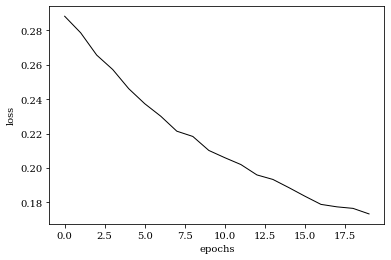

In [16]:
#モデル評価
val_loss = hist.history['val_loss']

fig = plt.figure()
plt.rc('font',family = 'serif')
plt.plot(range(len(val_loss)),val_loss,color = 'black', linewidth = 1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

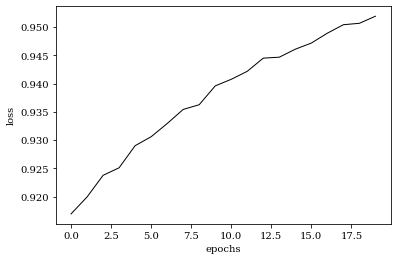

In [18]:
val_loss = hist.history['val_accuracy']
fig = plt.figure()
plt.rc('font',family = 'serif')
plt.plot(range(len(val_loss)),val_loss,color = 'black', linewidth = 1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# Tensorflow

In [19]:
#モデル実装
class DNN(Model):
    def __init__(self, hidden_dim, output_dim):
        super().__init__()
        self.l1 = Dense(hidden_dim, activation='relu')
        self.d1 = Dropout(0.5)
        self.l2 = Dense(hidden_dim, activation='relu')
        self.d2 = Dropout(0.5)
        self.l3 = Dense(hidden_dim, activation='relu')
        self.d3 = Dropout(0.5)
        self.l4 = Dense(output_dim, activation='softmax')

        self.ls = [self.l1, self.d1,
                   self.l2, self.d2,
                   self.l3, self.d3,
                   self.l4]

    def call(self, x):
        for layer in self.ls:
            x = layer(x)

        return x

In [20]:
#モデル構築
model = DNN(200,10)

In [26]:
#モデル学習
criterion = losses.SparseCategoricalCrossentropy()
optimizer = optimizers.SGD(lr = 0.01)

TypeError: __init__() missing 1 required positional argument: 'params'

In [23]:
%conda upgrade keras


PackageNotInstalledError: Package is not installed in prefix.
  prefix: /Users/tabata/opt/anaconda3/envs/deeplearning
  package name: keras



Note: you may need to restart the kernel to use updated packages.


# PyTorch

In [28]:
from torch.utils.data import random_split

In [29]:
mnist_train = datasets.MNIST()

AttributeError: module 'tensorflow_core.keras.datasets' has no attribute 'MNIST'

In [33]:

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optimizers
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import datasets
import torchvision.transforms as transforms

ModuleNotFoundError: No module named 'torchvision'

In [32]:
    root = os.path.join('~', '.torch', 'mnist')
    transform = transforms.Compose([transforms.ToTensor(),
                                    lambda x: x.view(-1)])
    mnist_train = datasets.MNIST(root=root,
                                 download=True,
                                 train=True,
                                 transform=transform)
    mnist_test = datasets.MNIST(root=root,
                                download=True,
                                train=False,
                                transform=transform)

    n_samples = len(mnist_train)
    n_train = int(n_samples * 0.8)
    n_val = n_samples - n_train

    mnist_train, mnist_val = \
        random_split(mnist_train, [n_train, n_val])

    train_dataloader = DataLoader(mnist_train,
                                  batch_size=100,
                                  shuffle=True)
    val_dataloader = DataLoader(mnist_val,
                                batch_size=100,
                                shuffle=False)
    test_dataloader = DataLoader(mnist_test,
                                 batch_size=100,
                                 shuffle=False)

NameError: name 'transforms' is not defined

# Keras

In [1]:
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
#モデル学習
model.compile(optimizer = 'sgd',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss',
                  patience=5,
                  verbose=1)

hist = model.fit(x_train,t_train,epochs = 1000, batch_size = 100, verbose = , validation_data = (x_val,t_val),callbacks = [es])

SyntaxError: invalid syntax (<ipython-input-3-8995f91f19e0>, line 10)

In [4]:
class EarlyStopping:
    def __init__(self, patience = 0, verbose = 0):
        self._step = 0
        self._loss = float('int')
        self.patience = patience
        self.verbose = verbose
    def __call__(self, loss):
        if self._loss < loss:
            self._step +=1
            if self._step > self.patience:
                if self.verbose:
                    print('early stopping')
                return True
            else:
                self._step = 0
                self._loss = loss
                
            return False

In [5]:
from callbacks import EarlyStopping

In [ ]:
#モデルの学習
epochs = 1000
batch_size = 100
n_batches_train = x_train.shape[0]//batch_size
n_batches_val = x_val.shape[0]//batch_size
hist = {'loss':[],'accuracy':[],'val_loss':[],'val_accuracy':[]}
es = EarlyStopping(patience=5, verbose=1)

for epoch in range(epochso):
    x_, t_ = shuffle(x_train,t_train)
    
    for batch in 